<a href="https://colab.research.google.com/github/missattack/VisaoComputacional/blob/main/VisaoComputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2

import numpy as np

from skimage import io

from google.colab.patches import cv2_imshow

import matplotlib.pylab as plt

In [17]:
origem = "https://i.imgur.com/mfgeIqb.png"
imagem = io.imread(origem)

In [18]:
img = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

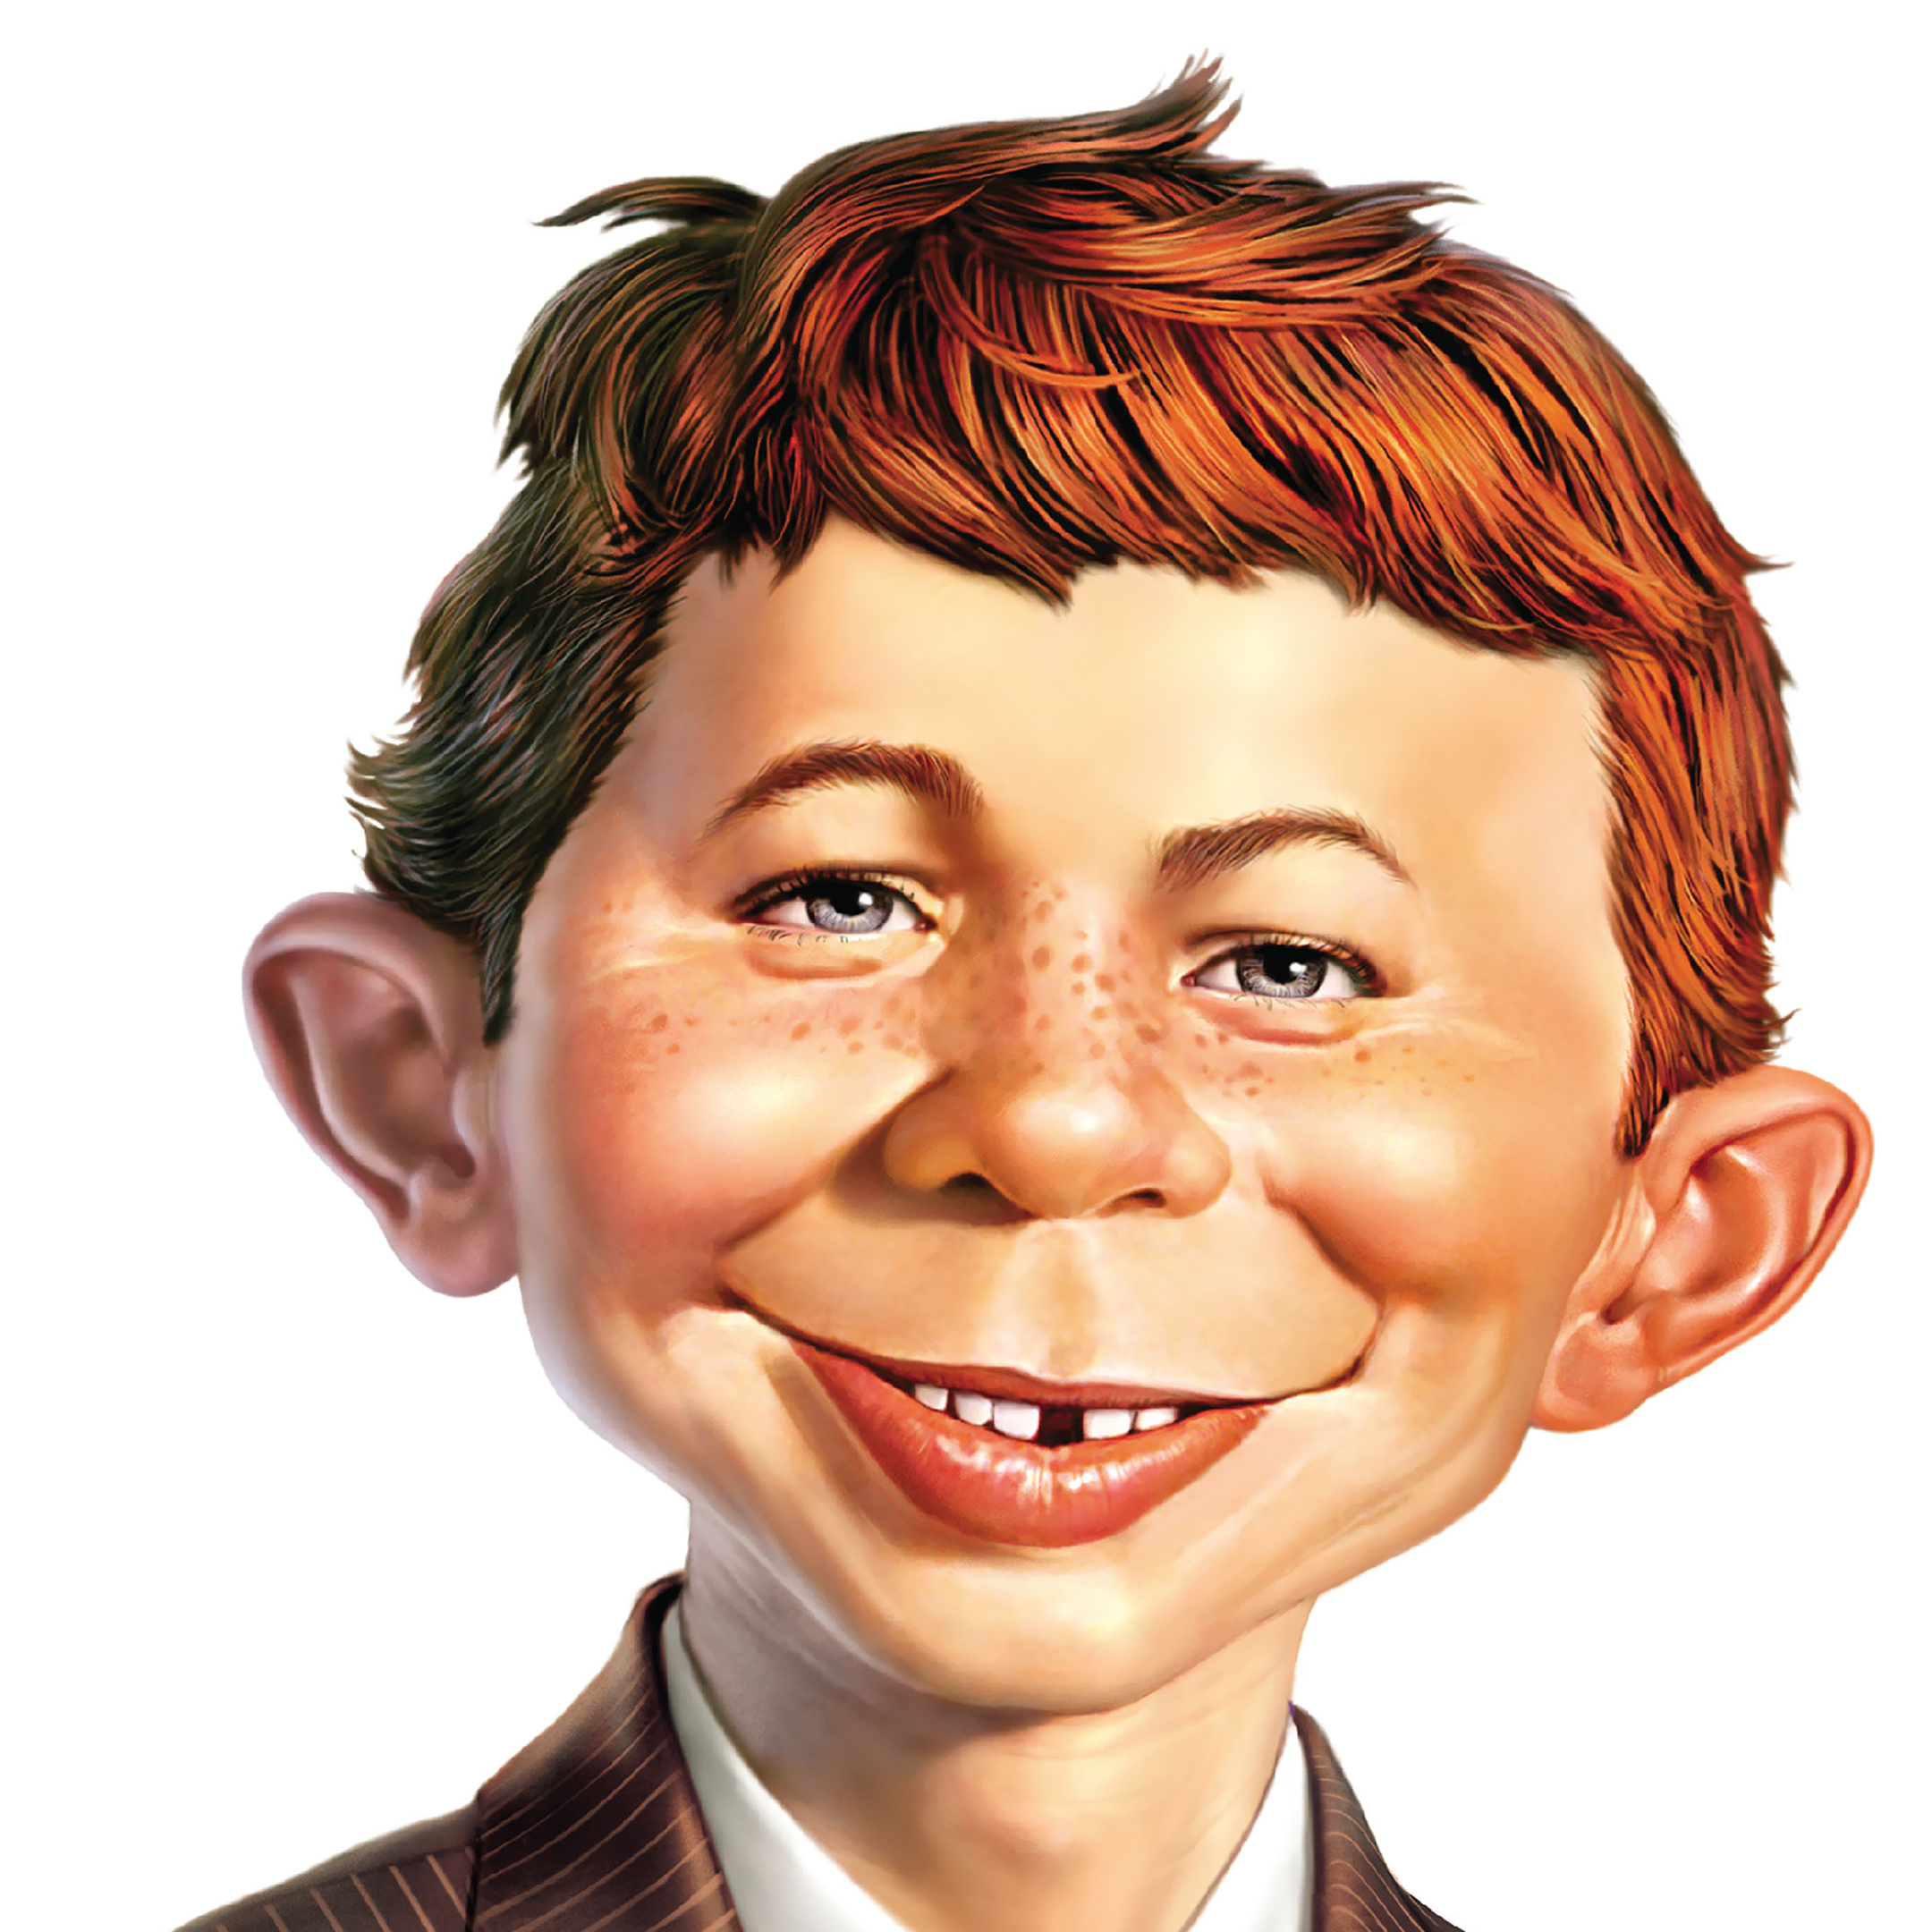

In [19]:
cv2_imshow(img)

In [20]:
# Obtém a dimensão da imagem
dimensao = img.shape
print(f"Dimensão da imagem original={dimensao}")

Dimensão da imagem original=(2160, 2160, 3)


In [21]:
# altura, largura, qtde de canais da imagem

altura = img.shape[0]
largura = img.shape[1]
qtd_canais = img.shape[2]

In [22]:
print(f"Largura={largura}, Altura={altura}, Qtde de Canais={qtd_canais}")

Largura=2160, Altura=2160, Qtde de Canais=3


In [23]:
dim = (200, 200)

# redimensiona a imagem
redimensao = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('redimensao: ',redimensao.shape)

redimensao:  (200, 200, 3)


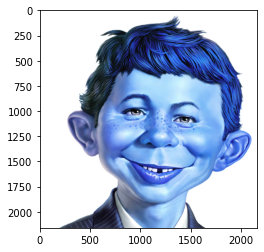

In [24]:
plt.imshow(img)

In [25]:
# adiciona um pouco de ruído à imagem para poder desfocá-la

array_ruido = np.empty_like(img)  #cria um array vazio do tamanho da imagem

# adiciona ruído img aleatório
np_ruido = cv2.randn(array_ruido, (0,0,0), (20,20,20)) 

# passa a imagem pelo filtro de ruído para adiciná-lo
img_ruido = cv2.addWeighted(img, 0.5, np_ruido, 0.5, 50) 

In [26]:
# Função de desfoque; kernel 15 e sigma 0

img_gaussianblur = cv2.GaussianBlur(img_ruido, (15, 15), 0)

<function destroyAllWindows>

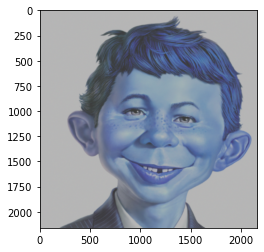

In [27]:
# plota imagem 
plt.imshow(img_gaussianblur)

cv2.waitKey(0)
cv2.destroyAllWindows

In [28]:
# Maior desfoque à imagem; kernel 21, sigma 9
#array_ruido2  =  np.empty_like ( img )
#rd  =  cv2.randn( img , ( 0 , 0 , 0 ), ( 1 , 1 , 1 )) 
#img_ruido2  =  cv2.addWeighted(array_ruido2 , 0.75 , rd , 0.75 , 60 )
#img_gaussianblur2 =  cv2.GaussianBlur (img_ruido2, ( 21 , 21 ), 9 )

#plt.imshow(img_gaussianblur2)
#cv2.waitKey(0)
#cv2.destroyAllWindows

In [29]:
# Segmentação por limiarização da imagem:

ret, img_masked = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)
print(f"Segmentação por limiarização: {ret}") 

Segmentação por limiarização: 220.0


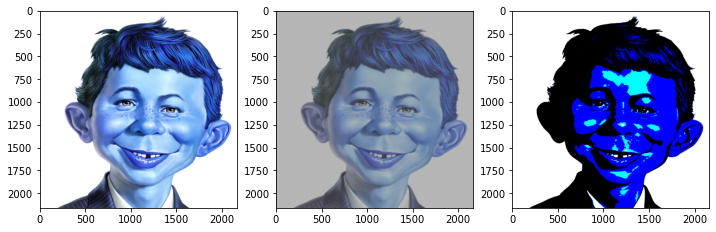

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(img) # imagem reduzida 200 x 200
ax[1].imshow(img_gaussianblur) # imagem filtro gaussiano
ax[2].imshow(img_masked) # imagem com segmentação por limiarização